![](img/banner.png)
%%HTML
<script src="require.js"></script>

# kNN in high dimensional spaces

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad

pth, python 3.7.16, numpy 1.21.5

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

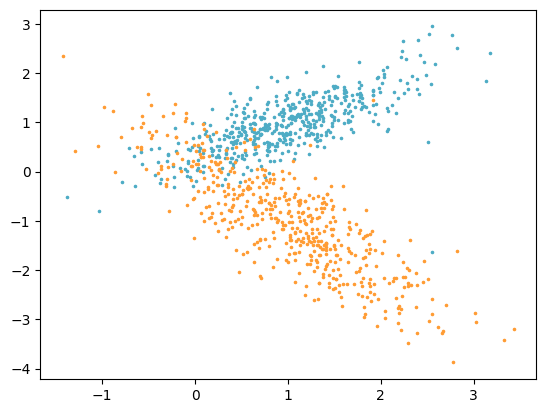

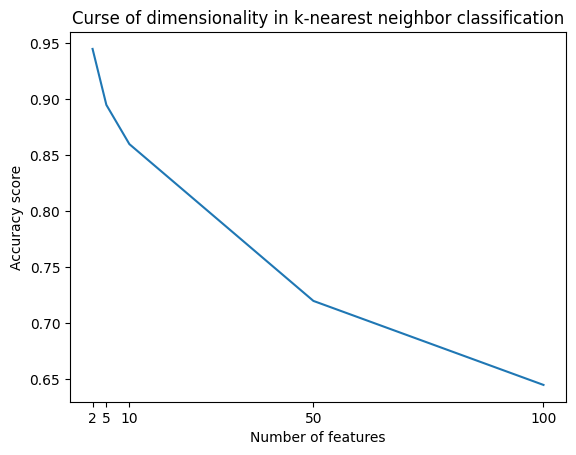

In [2]:
n_samples = 1000
n_classes = 2

# Define an empty list to store the accuracy scores
scores = []
n_dimensions = [2, 5, 10, 50, 100]  # , 200]#, 1000]

for d in n_dimensions:
    X, y = make_classification(
        n_samples=n_samples,
        n_features=d,
        n_classes = n_classes
        n_redundant=0,
        n_informative=2,
        random_state=1,
        n_clusters_per_class=1,
    )

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Train a k-nearest neighbor classifier with k=5
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Predict the test labels
    y_pred = clf.predict(X_test)

    # Compute the accuracy score
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if d == 2:
        # Plot init seeds along side sample data
        plt.figure(1)
        colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

        for k in range(n_classes):
            cluster_data = y == k
            plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=colors[k], marker=".", s=10)
        plt.show()

# Plot the accuracy scores versus the number of features
plt.plot(n_dimensions, scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy score")
plt.title("Curse of dimensionality in k-nearest neighbor classification")
plt.xticks(n_dimensions)
# plt.xscale("log")
plt.show()